In [4]:
# Importing the Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
path = '/content/drive/MyDrive/Data_Science/model/Weather_history_jordan_project/data_weather_jordan/irbed_data.csv'
df = pd.read_csv(path)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.drop('loc_id',axis = 1, inplace=True)
df.head(3)

,maxtempC,mintempC,avgtempC,totalprecipMM,windspeedKmph,sunhour,winddirdegree,weatherCode,humidity,visibilityKm,...,sunset,moon_illumination,month,month_sin,month_cos,day,day_sin,day_cos,wind_cos,wind_sin
date,,,,,,,,,,,,,,,,,,,,,
2008-07-01,35,22,28,0.0,11,13.6,276,113,52,10,...,19.8,89.7,7,-0.5,-0.866025,1,0.201299,0.979530,0.104528,-0.994522
2008-07-02,35,21,28,0.0,11,13.6,278,113,52,10,...,19.8,82.8,7,-0.5,-0.866025,2,0.394356,0.918958,0.139173,-0.990268
2008-07-03,34,21,27,0.0,10,13.6,282,113,57,10,...,19.8,75.9,7,-0.5,-0.866025,3,0.571268,0.820763,0.207912,-0.978148


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4683 entries, 2008-07-01 to 2021-04-26
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   maxtempC           4683 non-null   int64  
 1   mintempC           4683 non-null   int64  
 2   avgtempC           4683 non-null   int64  
 3   totalprecipMM      4683 non-null   float64
 4   windspeedKmph      4683 non-null   int64  
 5   sunhour            4683 non-null   float64
 6   winddirdegree      4683 non-null   int64  
 7   weatherCode        4683 non-null   int64  
 8   humidity           4683 non-null   int64  
 9   visibilityKm       4683 non-null   int64  
 10  pressureMB         4683 non-null   int64  
 11  cloudcover         4683 non-null   int64  
 12  HeatIndexC         4683 non-null   int64  
 13  DewPointC          4683 non-null   int64  
 14  WindChillC         4683 non-null   int64  
 15  WindGustKmph       4683 non-null   int64  
 16  FeelsL

### Data Visualization

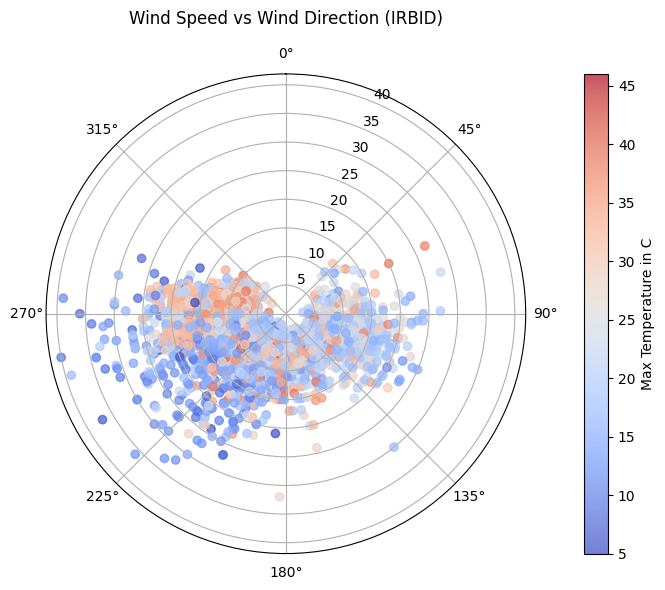

In [7]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, polar=True)

scatter = ax.scatter(
    np.radians(df['winddirdegree']),
    df['windspeedKmph'],
    c=df['maxtempC'],
    cmap='coolwarm',
    alpha=0.7,
)

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

cbar = plt.colorbar(scatter, label='Max Temperature in C')

cmap = scatter.get_cmap()

plt.title('Wind Speed vs Wind Direction (IRBID)\n\n')
plt.tight_layout()
plt.show()

df.drop(['winddirdegree'],axis=1,inplace=True)

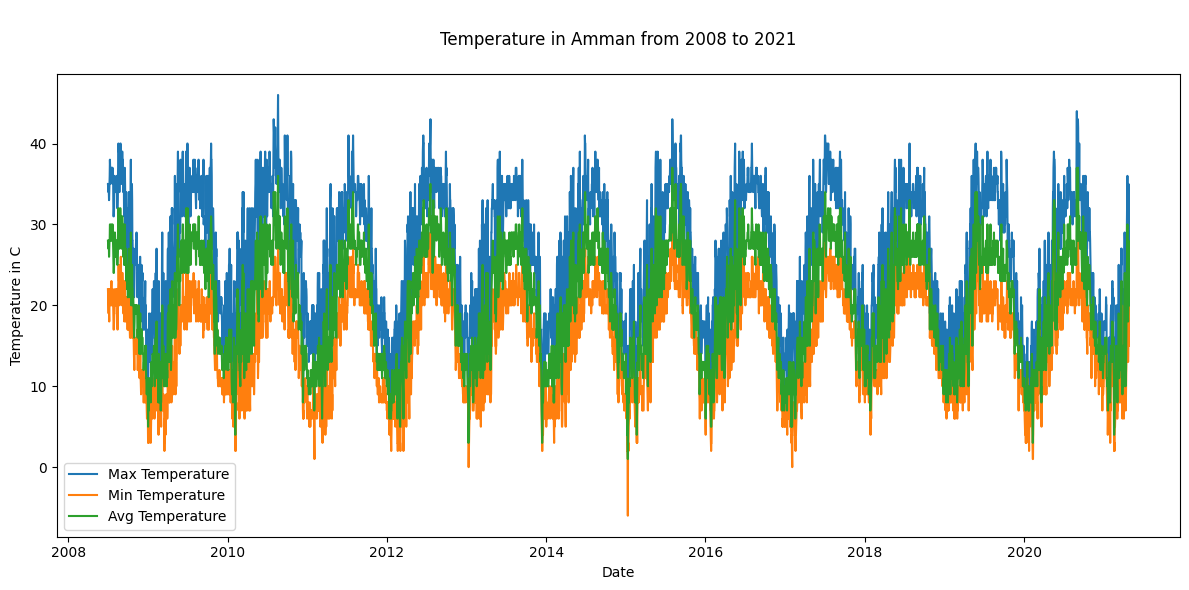

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df['maxtempC'], label='Max Temperature')
plt.plot(df['mintempC'], label='Min Temperature')
plt.plot(df['avgtempC'], label='Avg Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature in C')
plt.title('\nTemperature in Amman from 2008 to 2021\n')
plt.legend()
plt.tight_layout()
plt.show()

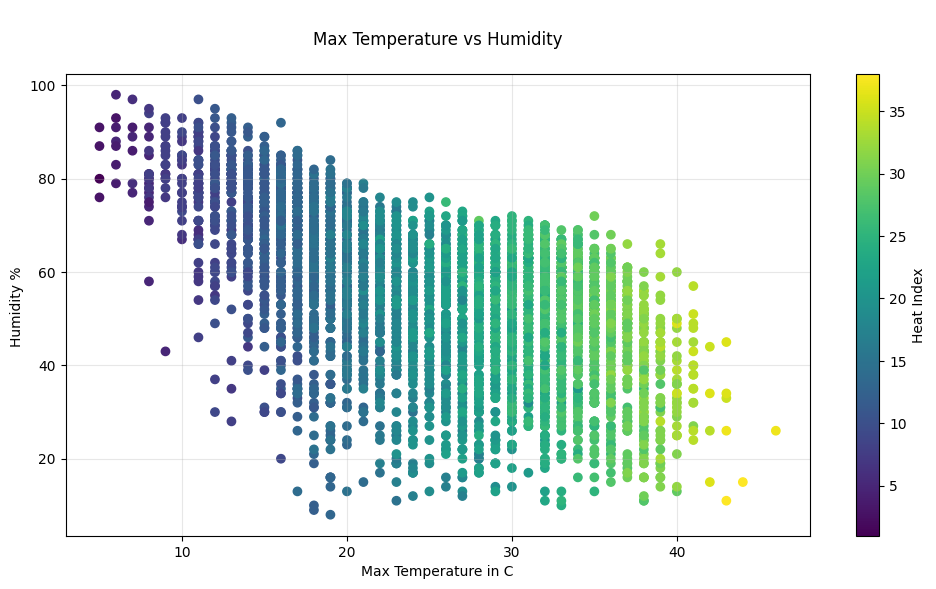

In [9]:
plt.figure(figsize=(12,6))
scatter = plt.scatter(df['maxtempC'], df['humidity'], c=df['HeatIndexC'],cmap='viridis')
plt.colorbar(scatter, label ='Heat Index')
plt.xlabel('Max Temperature in C')
plt.ylabel('Humidity % ')
plt.title('\nMax Temperature vs Humidity\n')
plt.grid(True, alpha = 0.3)
plt.show()

In [10]:
fig = px.line(df, y=['maxtempC','mintempC'], title='Temperature in Amman from 2008 to 2021')
fig.show()

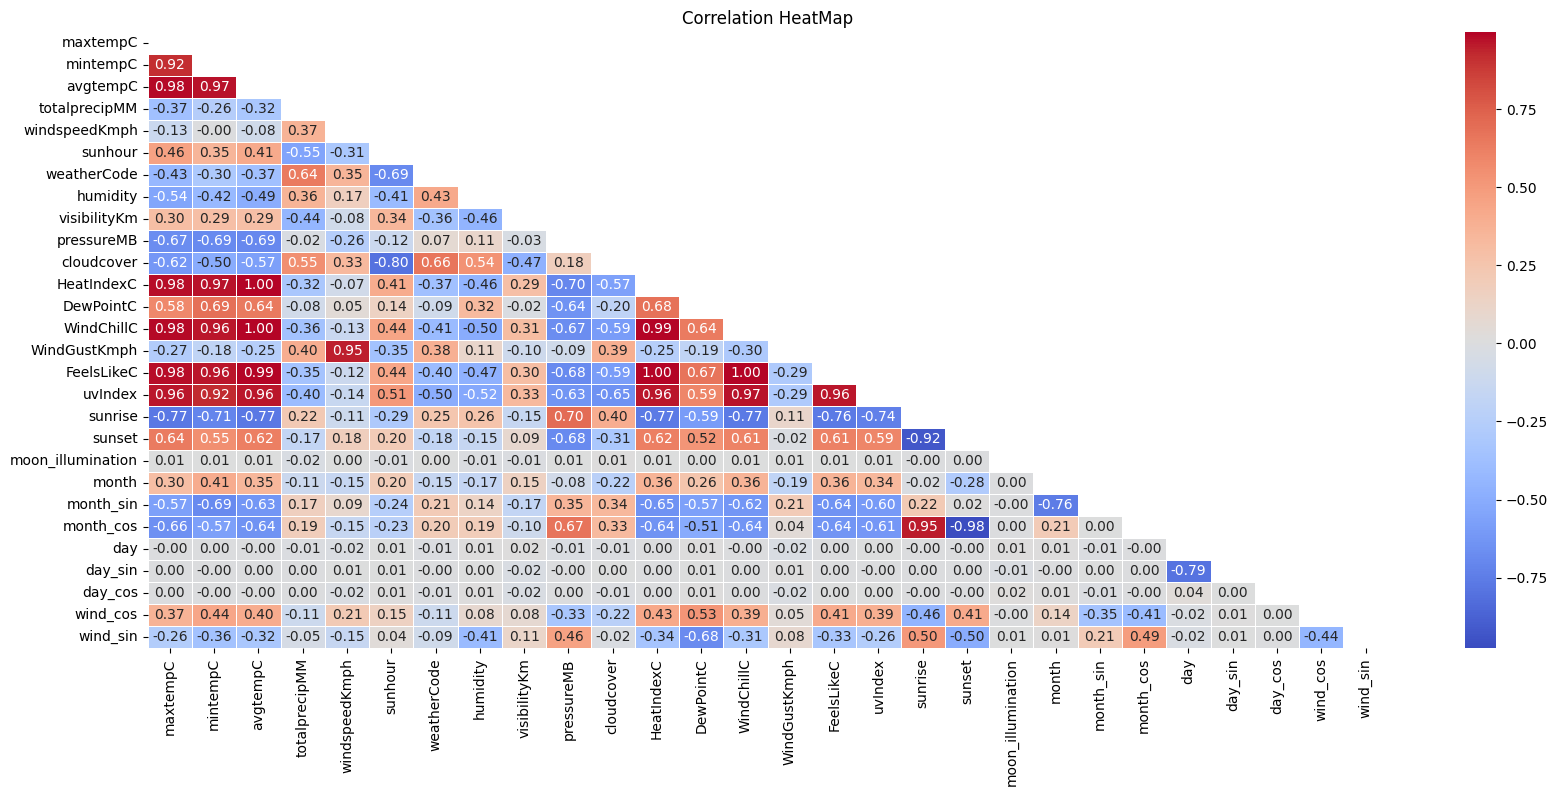

In [11]:
num_cols = df.select_dtypes(include=np.number).columns
cor_matrix = df[num_cols].corr()
mask = np.triu(np.ones_like(cor_matrix, dtype=bool))
plt.figure(figsize=(20,8))
sns.heatmap(cor_matrix ,mask = mask,annot =True ,cmap='coolwarm',fmt = ".2f",linewidths= 0.5)
plt.title("Correlation HeatMap")
plt.show()

In [12]:
# Get the absolute correlation values of 'maxtempC' with other features
correlations_with_maxtemp = abs(cor_matrix['maxtempC']).sort_values(ascending=False)

# Find highly correlated features (excluding 'maxtempC' itself)
high_correlations = correlations_with_maxtemp[correlations_with_maxtemp > 0.9][1:]
print("Highly Correlated Features:")
print(high_correlations)

# Drop the highly correlated columns from the DataFrame
# Not everything in high correlation will drop cause i want to use it as a target in other model
#df = df.drop(high_correlations.index, axis=1)
df.drop(['WindChillC','FeelsLikeC','HeatIndexC','uvIndex'],axis=1,inplace=True)

Highly Correlated Features:
WindChillC    0.982130
avgtempC      0.981757
FeelsLikeC    0.979077
HeatIndexC    0.976547
uvIndex       0.959943
mintempC      0.919194
Name: maxtempC, dtype: float64


In [13]:
print(df.head(3))
print(df.info())

            maxtempC  mintempC  avgtempC  totalprecipMM  windspeedKmph  \
date                                                                     
2008-07-01        35        22        28            0.0             11   
2008-07-02        35        21        28            0.0             11   
2008-07-03        34        21        27            0.0             10   

            sunhour  weatherCode  humidity  visibilityKm  pressureMB  ...  \
date                                                                  ...   
2008-07-01     13.6          113        52            10        1006  ...   
2008-07-02     13.6          113        52            10        1006  ...   
2008-07-03     13.6          113        57            10        1005  ...   

            sunset  moon_illumination  month  month_sin  month_cos  day  \
date                                                                      
2008-07-01    19.8               89.7      7       -0.5  -0.866025    1   
2008-07-02    19.8

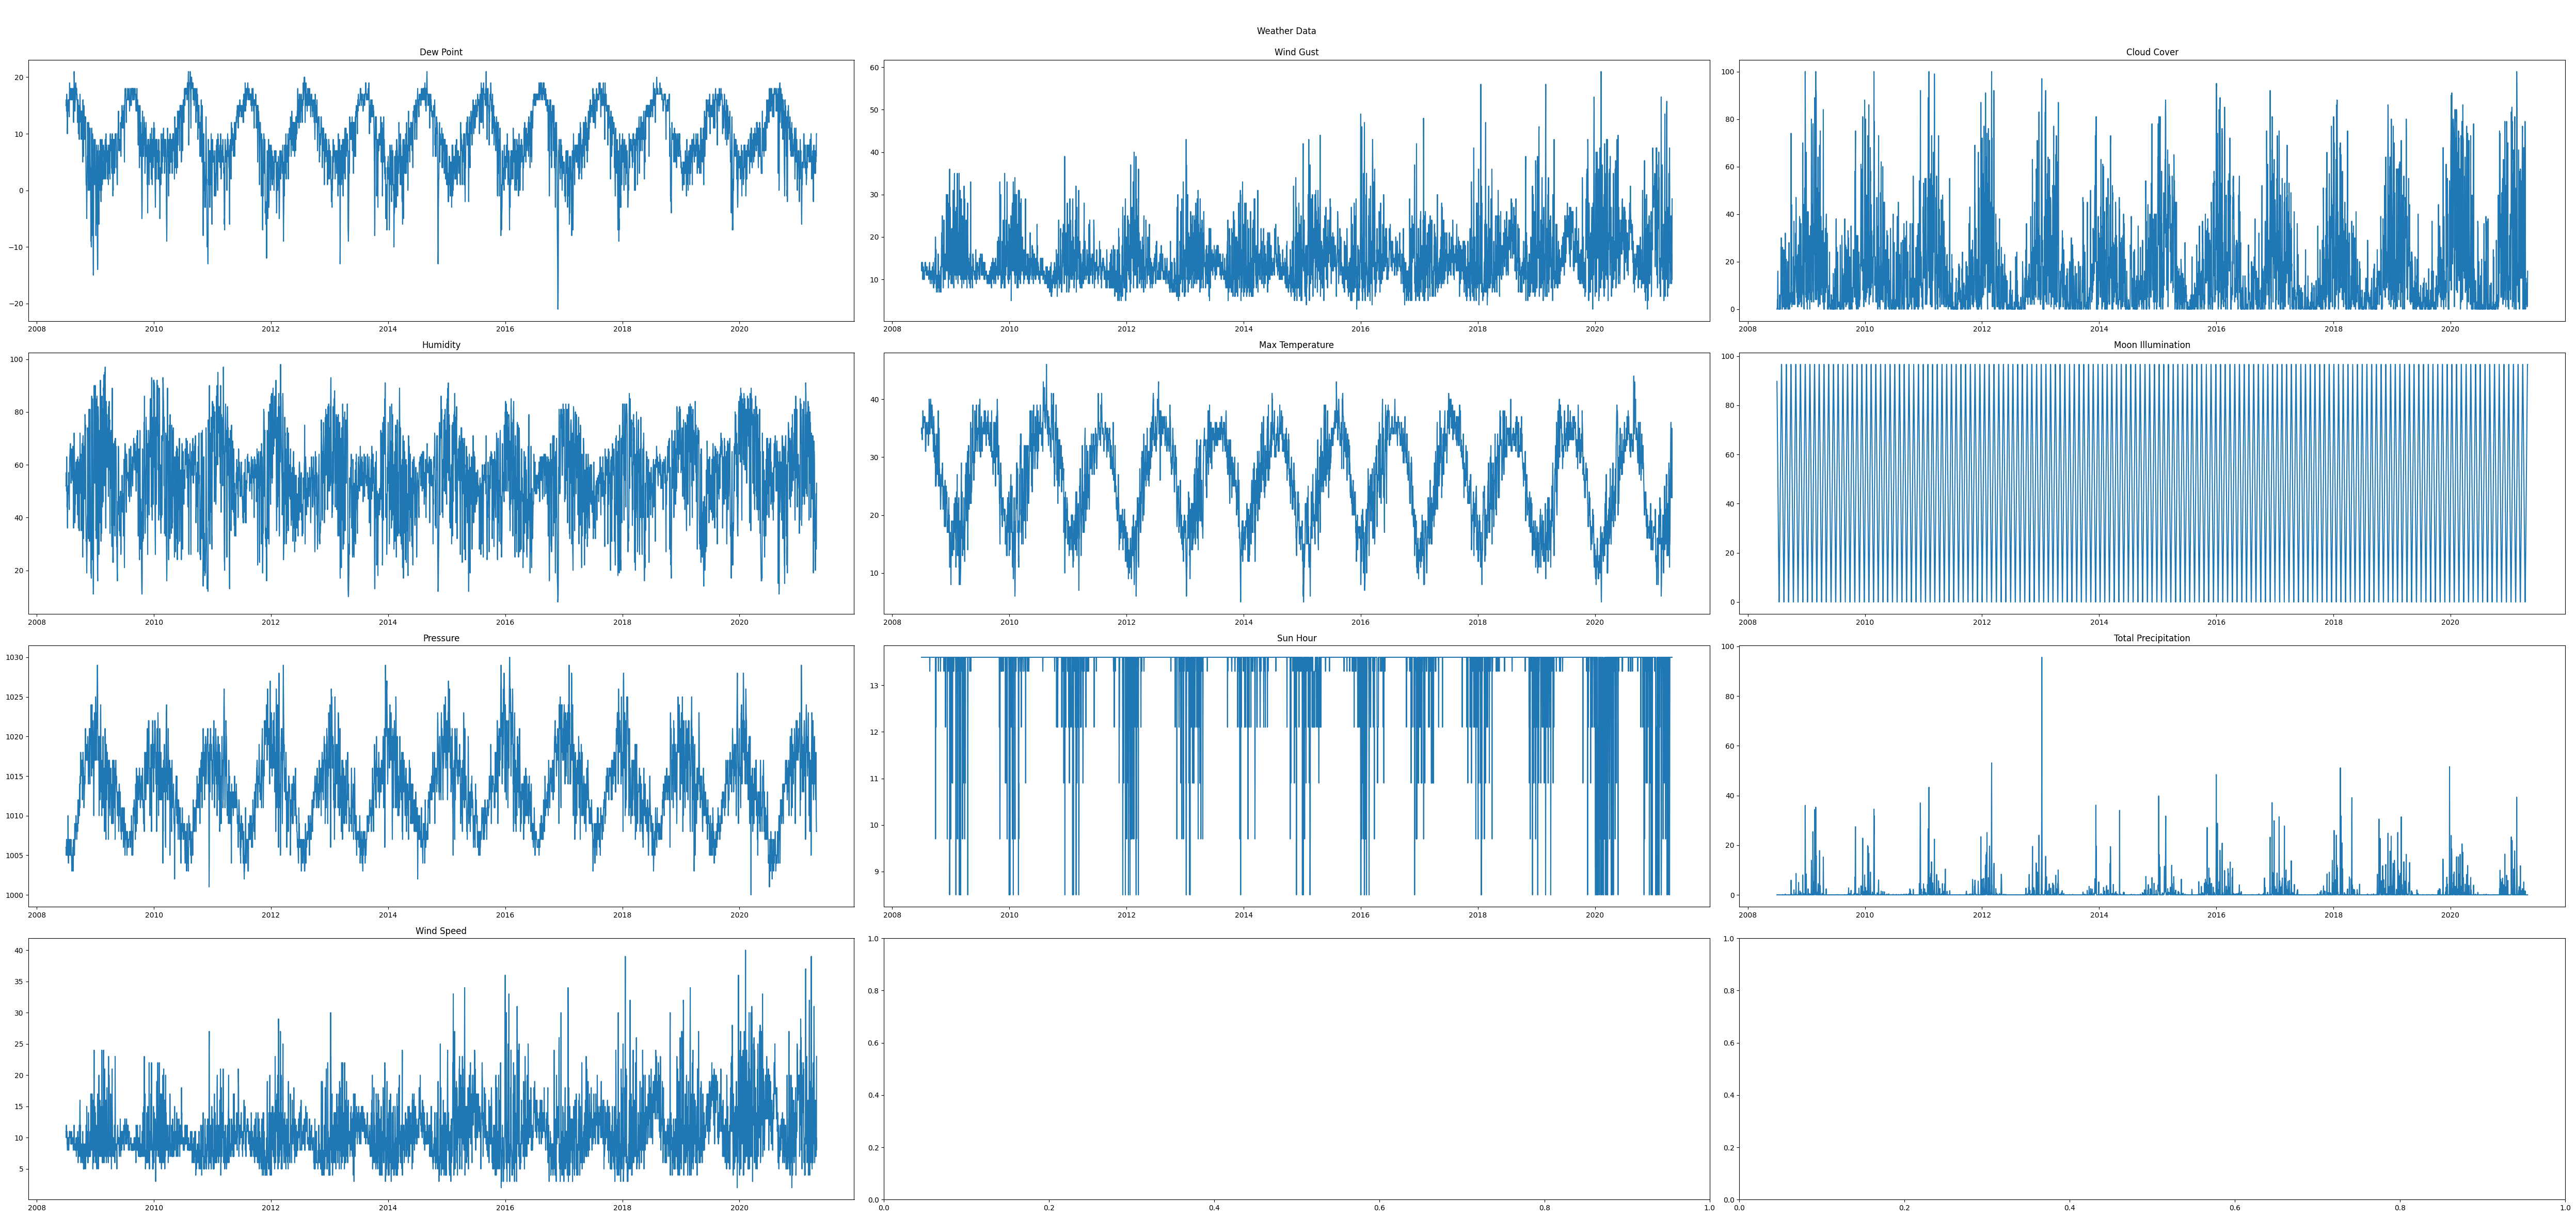

In [14]:
fig, ax = plt.subplots(4,3, figsize=(50 ,24))
fig.suptitle('\n\nWeather Data \n\n')

ax[0, 0].plot(df['DewPointC'])
ax[0, 0].set_title('Dew Point')
ax[0, 1].plot(df['WindGustKmph'])
ax[0, 1].set_title('Wind Gust')
ax[0, 2].plot(df['cloudcover'])
ax[0, 2].set_title('Cloud Cover')
ax[1, 0].plot(df['humidity'])
ax[1, 0].set_title('Humidity')
ax[1, 1].plot(df['maxtempC'])
ax[1, 1].set_title('Max Temperature')
ax[1, 2].plot(df['moon_illumination'])
ax[1, 2].set_title('Moon Illumination')
ax[2, 0].plot(df['pressureMB'])
ax[2, 0].set_title('Pressure')
ax[2, 1].plot(df['sunhour'])
ax[2, 1].set_title('Sun Hour')
ax[2, 2].plot(df['totalprecipMM'])
ax[2, 2].set_title('Total Precipitation')
ax[3, 0].plot(df['windspeedKmph'])
ax[3, 0].set_title('Wind Speed')
#ax[3, 1].plot(df['moonset'])
#ax[3, 1].set_title('moonset')
#ax[3, 2].plot(df['moonrise'])
#ax[3, 2].set_title('moonrise')

plt.tight_layout()
plt.show()

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
maxtempC,4683.0,25.964766,8.008155,5.000000,19.000000,2.700000e+01,33.000000,46.000000
mintempC,4683.0,15.428785,6.072167,-6.000000,10.000000,1.600000e+01,21.000000,30.000000
avgtempC,4683.0,20.269699,6.906039,1.000000,14.000000,2.100000e+01,26.000000,37.000000
totalprecipMM,4683.0,1.169308,4.390930,0.000000,0.000000,0.000000e+00,0.140000,95.600000
windspeedKmph,4683.0,11.105915,4.717601,2.000000,8.000000,1.000000e+01,13.000000,40.000000
sunhour,4683.0,13.266752,0.990160,8.500000,13.600000,1.360000e+01,13.600000,13.600000
weatherCode,4683.0,129.936579,55.708961,113.000000,113.000000,1.130000e+02,113.000000,389.000000
humidity,4683.0,54.852018,15.626600,8.000000,45.000000,5.600000e+01,65.000000,98.000000
visibilityKm,4683.0,9.714926,0.687104,2.000000,10.000000,1.000000e+01,10.000000,10.000000
pressureMB,4683.0,1013.236173,5.019458,1000.000000,1009.000000,1.013000e+03,1017.000000,1030.000000


In [16]:
fig = px.box(df,title='Temperature and Weather Metrics in Amman from 2008 to 2021')

fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [17]:
#Saving the data after cleaning
df.to_csv('/content/drive/MyDrive/Data_Science /Data_set/Irbid_data_For_ML.csv',index=True)

OSError: Cannot save file into a non-existent directory: '/content/drive/MyDrive/Data_Science /Data_set'